In [17]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

import numpy as np
from numba import jit

In [50]:
def uz(x, y):
    theta = np.arctan2(x,y)
    return 1/(2*np.pi)*theta

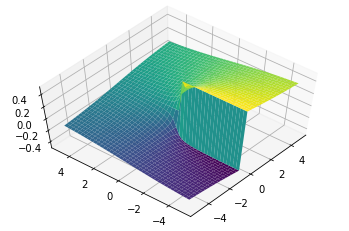

In [51]:
# Make data.
X = np.arange(-5, 5, .25)
Y = np.arange(-5, 5, .25)
X, Y = np.meshgrid(X, Y)

Z = uz(X, Y)

# Plot the surface.
fig = plt.figure()

ax = fig.gca(projection='3d')
ax.view_init(elev=60., azim=-140)

surf = ax.plot_surface(X, Y, Z, linewidth=0., antialiased=True, cmap=cm.viridis)

In [58]:
@jit(nopython=True)
def utheta_surface(r, z):
    return -.5/np.pi * r/(np.sqrt(r*r + z*z) + z)

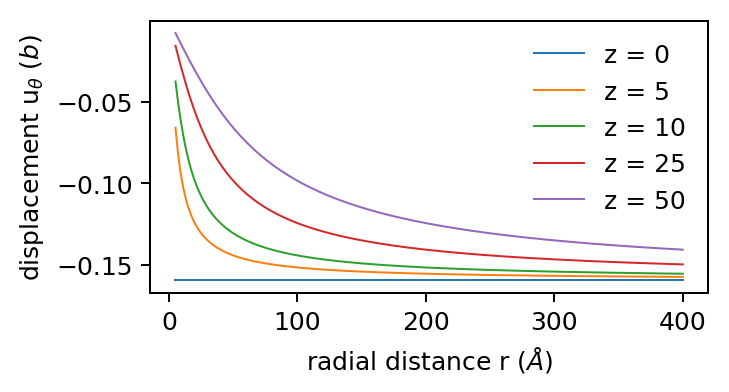

In [257]:
fig = plt.figure(figsize=(4,2), dpi=180)
ax = fig.add_subplot(111)

rrange = np.linspace(5, 400., 200)
zrange = [0, 5, 10, 25, 50]


for _z in zrange:
    ax.plot(rrange, utheta_surface(rrange, _z), lw = .8, label="z = %d" % _z)

    
ax.legend(loc='upper right', bbox_to_anchor=(1., 1.), frameon=False)

ax.set_xlabel('radial distance r ($\AA$)')
ax.set_ylabel(r'displacement u$_\theta$ ($b$)')

#ax.set_ylim(-50,5)

plt.show()

In [182]:
@jit(nopython=True)
def tau_tz0(r):
    return .5/np.pi * 1/r

@jit(nopython=True)
def tau_tz_surf(r, z):
    R = np.sqrt(r*r + z*z)
    return -.5/np.pi * r/(R*(R+z))

@jit(nopython=True)
def tau_rt_surf(r, z):
    R = np.sqrt(r*r + z*z)
    return .5/np.pi * (z*z/(R*R*R) + 1/(R+z))

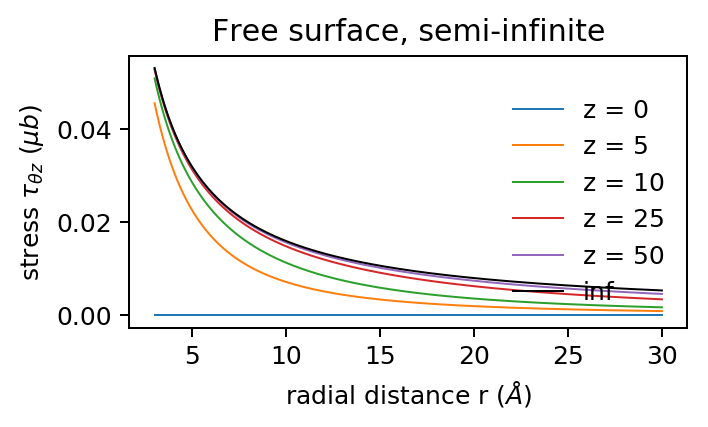

In [183]:
fig = plt.figure(figsize=(4,2), dpi=180)
ax = fig.add_subplot(111)

rrange = np.linspace(3., 30., 200)
zrange = [0, 5, 10, 25, 50]


for _z in zrange:
    ax.plot(rrange, tau_tz0(rrange) + tau_tz_surf(rrange, _z), lw = .8, label="z = %d" % _z)

ax.plot(rrange, tau_tz0(rrange), lw = .8, label="inf", c='k')
    
    
ax.legend(loc='lower right', bbox_to_anchor=(1., 0.), frameon=False)


ax.set_xlabel('radial distance r ($\AA$)')
ax.set_ylabel(r'stress $\tau_{\theta z}$ ($\mu b$)')
ax.set_title('Free surface, semi-infinite')

#ax.set_ylim(-50,5)

plt.show()

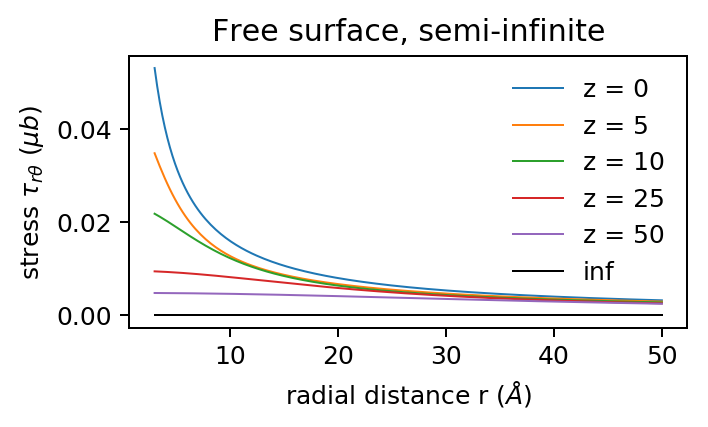

In [184]:
fig = plt.figure(figsize=(4,2.), dpi=180)
ax = fig.add_subplot(111)

rrange = np.linspace(3., 50., 200)
zrange = [0, 5, 10, 25, 50]


for _z in zrange:
    ax.plot(rrange, tau_rt_surf(rrange, _z), lw = .8, label="z = %d" % _z)

ax.plot(rrange, 0.*rrange, lw = .8, label="inf", c='k')
    
    
ax.legend(loc='upper right', bbox_to_anchor=(1., 1.), frameon=False)

ax.set_xlabel('radial distance r ($\AA$)')
ax.set_ylabel(r'stress $\tau_{r\theta}$ ($\mu b$)')
ax.set_title('Free surface, semi-infinite')

#ax.set_ylim(-50,5)

plt.show()

In [280]:
@jit
def u_theta_slab(r, z, d, nmax=10):
    nrange = np.arange(0, nmax+1)
    nsum = 0.
    for n in nrange:
        nsum += 1/np.pi * (np.sin(.5*n*np.pi) * 2/((n+1e-16)*np.pi) *  
                           kn(1, .5*(n+1e-16)*np.pi*r/d) * 
                           np.sin(.5*n*np.pi*z/d))
    return -.5*z/(np.pi*r) + nsum

@jit
def tau_tz_slab(r, z, d, nmax=10):
    nrange = np.arange(0, nmax+1)
    nsum = 0.
    for n in nrange:
        nsum += 1/(np.pi*d) * (np.sin(.5*n*np.pi) * 
                               kn(1, .5*(n+1e-16)*np.pi*r/d) * 
                               np.cos(.5*n*np.pi*z/d))
    return nsum

@jit
def tau_rt_slab(r, z, d, nmax=10):
    nrange = np.arange(0, nmax+1)
    nsum = 0.
    for n in nrange:
        nsum += -1/(np.pi*d) * (np.sin(.5*n*np.pi) * 
                                kn(2, .5*(n+1e-16)*np.pi*r/d) * 
                                np.sin(.5*n*np.pi*z/d))
    return z/(np.pi*r*r) + nsum

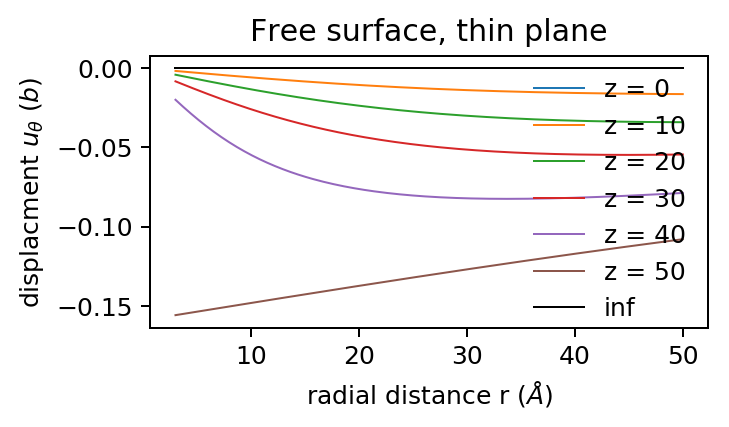

In [294]:
fig = plt.figure(figsize=(4,2.), dpi=180)
ax = fig.add_subplot(111)

rrange = np.linspace(3., 50., 200)
zrange = np.linspace(0, d, 6)
thickness = 100
d = thickness/2

for _z in zrange:
    ax.plot(rrange, u_theta_slab(rrange, _z, d, nmax=100), lw = .8, label="z = %d" % _z)

ax.plot(rrange, 0.*rrange, lw = .8, label="inf", c='k')
    
    
ax.legend(loc='upper right', bbox_to_anchor=(1., 1.), frameon=False)

ax.set_xlabel('radial distance r ($\AA$)')
ax.set_ylabel(r'displacment $u_{\theta}$ ($b$)')
ax.set_title('Free surface, thin plane')

#ax.set_ylim(-50,5)

plt.show()

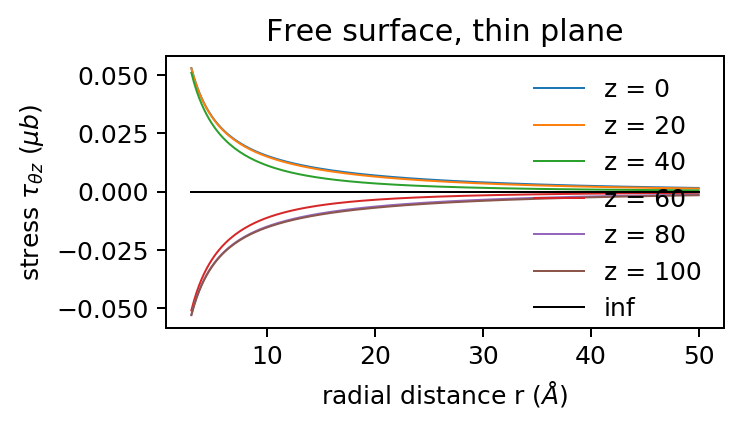

In [271]:
fig = plt.figure(figsize=(4,2.), dpi=180)
ax = fig.add_subplot(111)

rrange = np.linspace(3., 50., 200)
zrange = np.linspace(0, 2*d, 6)
thickness = 100
d = thickness/2

for _z in zrange:
    ax.plot(rrange, tau_tz_slab(rrange, _z, d, nmax=50), lw = .8, label="z = %d" % _z)

ax.plot(rrange, 0.*rrange, lw = .8, label="inf", c='k')
    
    
ax.legend(loc='upper right', bbox_to_anchor=(1., 1.), frameon=False)

ax.set_xlabel('radial distance r ($\AA$)')
ax.set_ylabel(r'stress $\tau_{\theta z}$ ($\mu b$)')
ax.set_title('Free surface, thin plane')

#ax.set_ylim(-50,5)

plt.show()

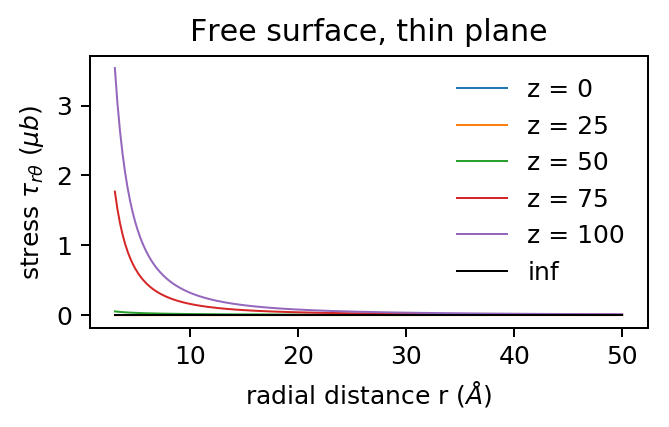

In [274]:
fig = plt.figure(figsize=(4,2.), dpi=180)
ax = fig.add_subplot(111)

rrange = np.linspace(3., 50., 200)
zrange = np.linspace(0, 2*d, 5)
thickness = 100
d = thickness/2

for _z in zrange:
    ax.plot(rrange, tau_rt_slab(rrange, _z, d, nmax=50), lw = .8, label="z = %d" % _z)

ax.plot(rrange, 0.*rrange, lw = .8, label="inf", c='k')
    
    
ax.legend(loc='upper right', bbox_to_anchor=(1., 1.), frameon=False)

ax.set_xlabel('radial distance r ($\AA$)')
ax.set_ylabel(r'stress $\tau_{r\theta}$ ($\mu b$)')
ax.set_title('Free surface, thin plane')

#ax.set_ylim(-50,5)

plt.show()